In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

 40% 6.00M/15.1M [00:00<00:00, 56.4MB/s]
100% 15.1M/15.1M [00:00<00:00, 91.5MB/s]


In [ ]:
# Our file is in zip formate so we unzip the given dataset
import zipfile
zip_ref=zipfile.ZipFile('/content/brain-mri-images-for-brain-tumor-detection.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import os

In [ ]:
yes_brain_tumor=os.listdir('/content/brain_tumor_dataset/yes')
no_brain_tumor=os.listdir('/content/brain_tumor_dataset/no')

In [ ]:
yes_brain_tumor[2:6]

['Y38.jpg', 'Y181.jpg', 'Y40.JPG', 'Y27.jpg']

In [ ]:
no_brain_tumor[2:6]

['46 no.jpg', 'no 2.jpg', 'No16.jpg', 'N16.jpg']

In [ ]:
len(yes_brain_tumor)

155

In [ ]:

len(no_brain_tumor)

98

In [ ]:


# here creating the labels
# here 1 represents that the patients has the brain tumor
# here 0 reperesents that the patients has not a brain tumor

In [ ]:
yes_brain_tumor_label=[1]*len(yes_brain_tumor)
no_brain_tumor_label=[0]*len(no_brain_tumor)
labels=yes_brain_tumor_label+no_brain_tumor_label

In [ ]:
len(labels)

253

In [ ]:
import cv2
from PIL import Image
import numpy as np
from google.colab.patches import cv2_imshow

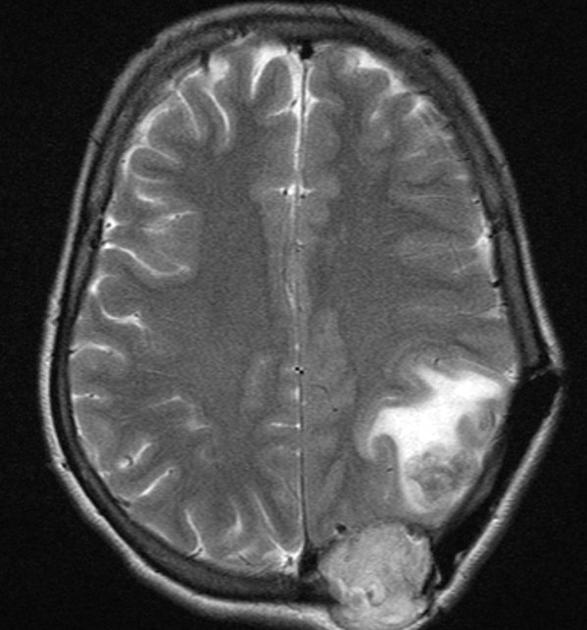

In [ ]:
# displaying the image of the brain tumor
tumor=cv2.imread('/content/brain_tumor_dataset/yes/Y102.jpg')
cv2_imshow(tumor)

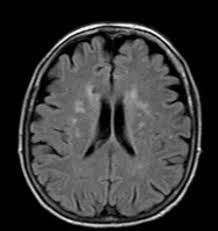

In [ ]:
# displaying the image of that is free from the tumor
tumorless=cv2.imread('/content/brain_tumor_dataset/no/17 no.jpg')
cv2_imshow(tumorless)

In [ ]:
# performing the image processing

tumor_path='/content/brain_tumor_dataset/yes/'

data=[]

for i in yes_brain_tumor:
  image=Image.open(tumor_path+i)
  image=image.resize((128,128))
  image=image.convert("RGB")
  image=np.array(image)

  data.append(image)


tumorfree_path='/content/brain_tumor_dataset/no/'

for i in no_brain_tumor:
  image=Image.open(tumorfree_path+i)
  image=image.resize((128,128))
  image=image.convert("RGB")
  image=np.array(image)
  data.append(image)




In [ ]:
# converting the image list to numpy arrar
X=np.array(data)
y=np.array(labels)

In [ ]:
len(X)

253

In [ ]:
len(y)

253

In [ ]:
# splitting the dataset into train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(253, 128, 128, 3) (177, 128, 128, 3) (76, 128, 128, 3)


In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
# building the cnn model

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout

In [ ]:
model=Sequential()

# creating the first convolution layers
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='valid',input_shape=(128,128,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=None))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(MaxPool2D(pool_size=(2,2),strides=None))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='sigmoid'))


In [ ]:
# compiling the model

model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=10,
    verbose=1,
    mode="auto",
    restore_best_weights=True,

)

In [ ]:
history1=model.fit(X_train,y_train,epochs=50,callbacks=[early_stopping],validation_split=0.2,verbose=True)

Epoch 1/50
5/5 [==============================] - 3s 79ms/step - loss: 0.7571 - accuracy: 0.5319 - val_loss: 0.6337 - val_accuracy: 0.8056
Epoch 2/50
5/5 [==============================] - 0s 34ms/step - loss: 0.6171 - accuracy: 0.6596 - val_loss: 0.5534 - val_accuracy: 0.7222
Epoch 3/50
5/5 [==============================] - 0s 33ms/step - loss: 0.5894 - accuracy: 0.6596 - val_loss: 0.5266 - val_accuracy: 0.7500
Epoch 4/50
5/5 [==============================] - 0s 30ms/step - loss: 0.5025 - accuracy: 0.7589 - val_loss: 0.5022 - val_accuracy: 0.7500
Epoch 5/50
5/5 [==============================] - 0s 29ms/step - loss: 0.5102 - accuracy: 0.7660 - val_loss: 0.4889 - val_accuracy: 0.7500
Epoch 6/50
5/5 [==============================] - 0s 26ms/step - loss: 0.5209 - accuracy: 0.7801 - val_loss: 0.5115 - val_accuracy: 0.7500
Epoch 7/50
5/5 [==============================] - 0s 28ms/step - loss: 0.4983 - accuracy: 0.8156 - val_loss: 0.4839 - val_accuracy: 0.7500
Epoch 8/50
5/5 [===========

In [ ]:
loss,accuracy=model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 9ms/step - loss: 1.2109 - accuracy: 0.7368


In [ ]:
print('Test accuracy ',accuracy)

Test accuracy  0.7368420958518982


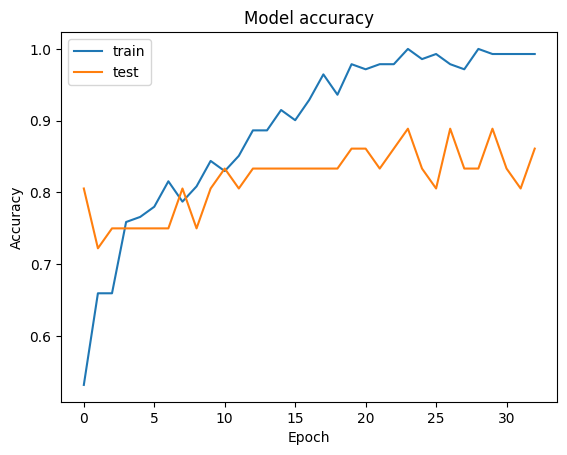

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'],label='train')
plt.plot(history1.history['val_accuracy'],label='test')

plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel('Accuracy')
plt.legend(loc='upper left')


plt.show()

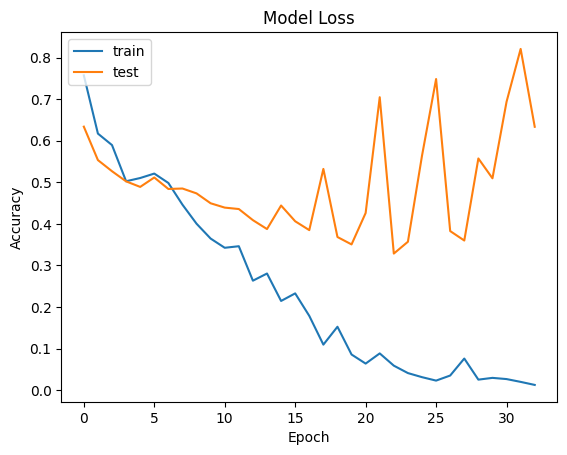

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel('Accuracy')

plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
import pickle
pickle.dump(model,open('brain_tumor_model.pkl','wb'))

Enter the path of the image to be predicted:/content/pure brain.png


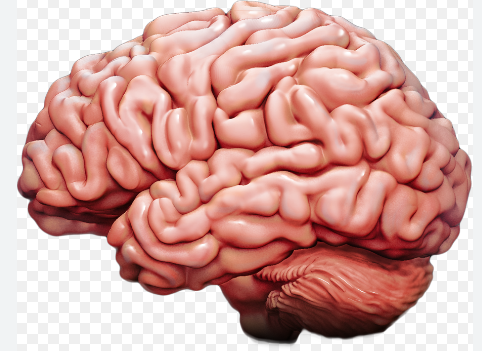

1/1 [==============================] - 0s 23ms/step
[[0.6578171  0.44492832]]
0
Negative Tumor


In [ ]:
# Making  a predictive system
input_image_path=input('Enter the path of the image to be predicted:')

input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resize/255
input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])
input_prediction=model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label==1:
  print('Postive Tumor')
else:
  print("Negative Tumor")